# Exploratory analysis of Boston 311 data from 2011 to 2017

## Table of content

    1. Introduction 
    2. Exploratory analysis
    3. Longitudinal analysis
    4  Analysis based on Subject, Reason and Type
    5. Neighborhood analysis
    6. Reporting source analysis
    7. Government response analysis: Solving duration, ontime and overdue
    8. Conclusion
    9. Appendix

### 1. Introduction 
The 311 hotline provides an easy way for residents to connect with the City of Boston and request non-emergency city services and information. Boston 311 data is a latest, resourceful and open access dataset for municipal services of Boston. The data structure of 311 data are three levels. All 311 complaints cases are categorized into 14 subject category listed in Table 1. These subjects can be further broken down to 45 reasons and then sub-divided into 173 types.

    Table 1. 14 subject of 311 cases
    ●	Public Works Department
    ●	Transportation - Traffic Division
    ●	Animal Control
    ●	Property Management
    ●	Inspectional Services
    ●	Parks & Recreation Department
    ●	Civil Rights
    ●	Mayor's 24 Hour Hotline
    ●	Boston Police Department
    ●	Boston Water & Sewer Commission
    ●	Disability Department
    ●	Consumer Affairs & Licensing
    ●	Neighborhood Services
    ●	Youthline
    
This research aim to understand following research questions: 
  1. Based on 311 data, what are the meaningful indicators that reflect government performance?
  2. Doe the 311 reporting pattern could be explained by economic or demographic information?

Table 2 list six basic indicators that could be obtained from 311 data. If we tabulate any two factors from the six, it will form an new indicator of 311 data. So, theoretically the six indicators are able to form 15 different two factor tabulations, and 20 different three factor tabulations. It may not possible to explore all different indicators so this study categorize these indicators into different domains and conduct following analysis: longitudinal analysis, neighborhood analysis, reporting source analysis, ontime and overdue analysis. 
   
    Table 2. Key indicators of 311 cases
    Q Most frequently requested case ( # quantity of case)
    N Neighborhoods locations 
    C Category or type of cases
    T Time of reporting (Day, week, month, season, year) 
    R Response time of the city
    M Reporting methods: phone, app or city employee.
    
We use the full 311 dataset that from the year of 2011 to the end of 2017.
heat map



### 2. Exploratory analysis
#### 2.1 Import and manipulate data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time
plt.style.use('ggplot') # Look Pretty
import seaborn as sns

In [3]:
quanbu =pd.read_csv('/Users/haoyuzhao/Google Drive/311__all_to_2018-1-3.csv', encoding="ISO-8859-1", index_col='open_dt', parse_dates=True)
quanbu2=quanbu.drop(['CASE_ENQUIRY_ID', 'target_dt', 'closed_dt',
       'CASE_STATUS', 'CLOSURE_REASON', 'CASE_TITLE', 'QUEUE', 'Department', 'SubmittedPhoto', 'ClosedPhoto',
       'Location', 'Fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood_services_district',
       'ward', 'precinct', 'LOCATION_STREET_NAME', 'LOCATION_ZIPCODE',
       'Latitude', 'Longitude'],axis=1)
quanbu2=quanbu2.sort_index(ascending=True)
quanbu201=quanbu2.reset_index()
quanbu202=quanbu201.reset_index()

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 2.2 Descriptive statistics

    

In [4]:
subject=quanbu.SUBJECT.value_counts()
reason=quanbu.REASON.value_counts()
type=quanbu.TYPE.value_counts()
neighborhood=quanbu.neighborhood.value_counts()
source=quanbu.Source.value_counts()
ontime=quanbu.OnTime_Status.value_counts()

In [7]:
quanbu.head()

,CASE_ENQUIRY_ID,target_dt,closed_dt,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,TYPE,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Latitude,Longitude,Source
open_dt,,,,,,,,,,,,,,,,,,,,,
2018-01-02 23:41:00,101002298175,2018-01-17 08:30:00,NaN,ONTIME,Open,,PRINTED : robert,Public Works Department,Street Lights,Street Light Outages,...,B2,Dorchester,13,Ward 7,0710,48 Wendover St,2125.0,42.3192,-71.0664,Constituent Call
2018-01-02 23:36:03,101002298174,2018-01-04 23:36:03,NaN,ONTIME,Open,,Unshoveled Sidewalk,Public Works Department,Code Enforcement,Unshoveled Sidewalk,...,E13,Jamaica Plain,11,11,1106,INTERSECTION Amory St & New Minton St,NaN,42.3594,-71.0587,Citizens Connect App
2018-01-02 23:34:55,101002298173,2018-01-04 23:34:55,NaN,ONTIME,Open,,Unshoveled Sidewalk,Public Works Department,Code Enforcement,Unshoveled Sidewalk,...,E13,Jamaica Plain,11,Ward 11,1106,267 Amory St,2130.0,42.3153,-71.1046,Citizens Connect App
2018-01-02 23:29:55,101002298172,2018-01-04 23:29:55,NaN,ONTIME,Open,,Unshoveled Sidewalk,Public Works Department,Code Enforcement,Unshoveled Sidewalk,...,C6,South Boston / South Boston Waterfront,5,Ward 6,0609,885 E Broadway,2127.0,42.3356,-71.0286,Citizens Connect App
2018-01-02 23:23:04,101002298171,2018-01-05 08:30:00,NaN,ONTIME,Open,,Request for Snow Plowing,Public Works Department,Street Cleaning,Request for Snow Plowing,...,A1,Downtown / Financial District,3,3,0306,INTERSECTION Pearl St & Interstate 93 N,NaN,42.3594,-71.0587,Citizens Connect App


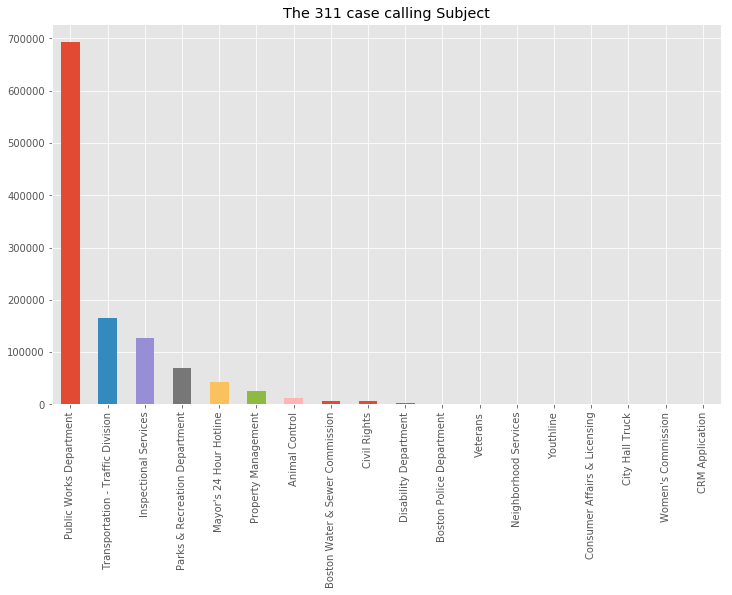

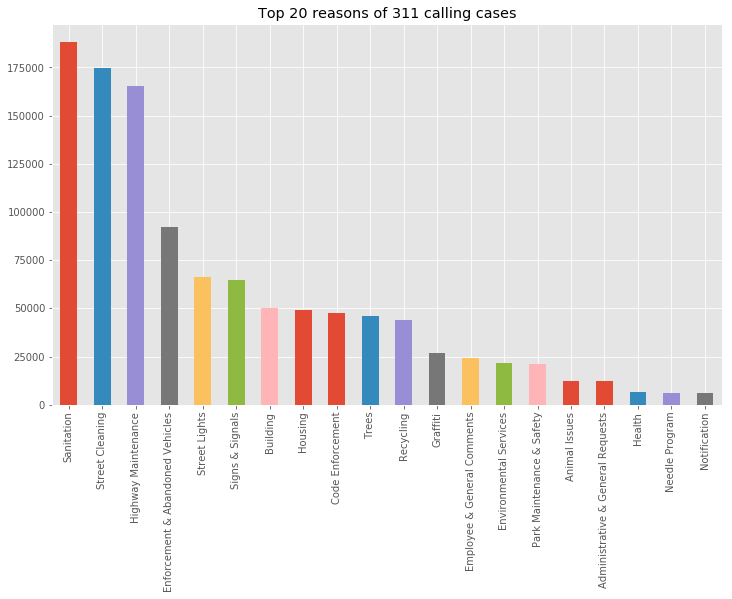

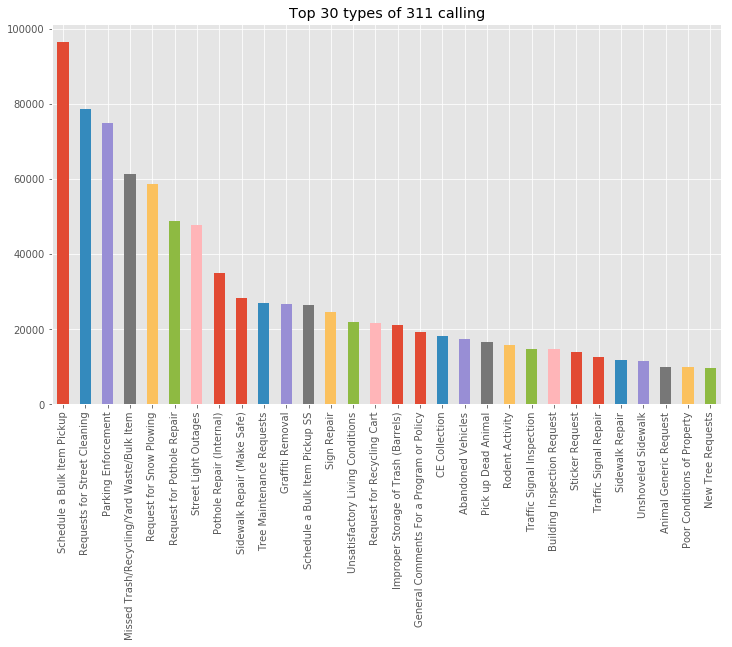

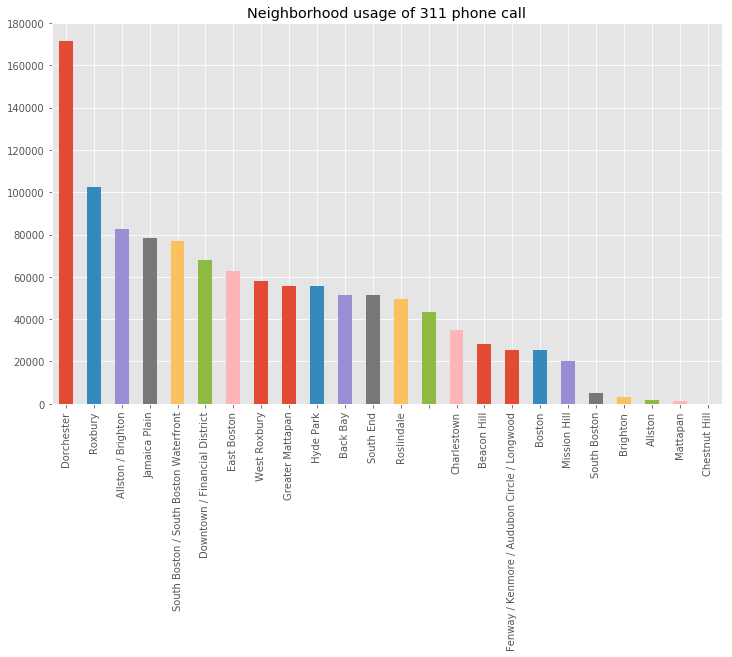

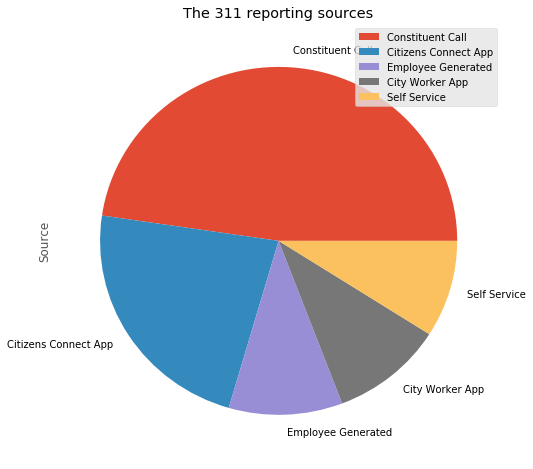

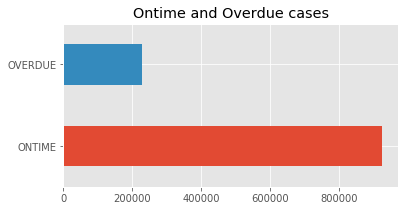

In [40]:
subject.plot(kind='bar',figsize=(12,7),title='The 311 case calling Subject')
plt.show()
reason[:20].plot(kind='bar',figsize=(12,7),title='Top 20 reasons of 311 calling cases')
plt.show()
type[:30].plot(kind='bar',figsize=(12,7),title='Top 30 types of 311 calling')
plt.show()
neighborhood.plot(kind='bar',figsize=(12,7),title='Neighborhood usage of 311 phone call')
plt.show()
source[:5].plot(kind='pie',legend=True,figsize=(8,8),title='The 311 reporting sources')
plt.show()
ontime.plot(kind='barh',title='Ontime and Overdue cases',figsize=(6,3))
plt.show()

### 3. Longitudinal analysis
#### 3.1 data preparation
In order to make assessment of 311 data longitudinally, we create a set of variables that identify the hour, weekday, week, month, quarter of each 311 case.

In [5]:
#pandas datatime get hour, week, weekday, month, quarter, year number#
quanbu202['open_dt2']=pd.to_datetime(quanbu201['open_dt'])
quanbu202['hour']=quanbu202['open_dt2'].dt.hour
# convert hour number into category#
quanbu202['hour']=pd.cut(quanbu202['hour'], bins=[0,4,8, 12,17,21,24],
                         labels=['after midnight (0am-4am)','early morning(4-8am)', 
                                 'before noon (8am to 12pm)', 'after noon(12pm to 17 pm)',
                                 'evening(17pm to 21pm)','night(21-24)'])
quanbu202['year']=quanbu202['open_dt2'].dt.year
quanbu202['week']=pd.to_datetime(quanbu202['open_dt']).dt.week
quanbu202['weekday']=quanbu202['open_dt2'].dt.weekday
quanbu202['month']=quanbu202['open_dt2'].dt.month
quanbu202['quarter']=quanbu202['open_dt2'].dt.quarter
quanbu202['case']=1

In [6]:
# distinguish week, month and quarter number by year#
quanbu202['bar']='-'
quanbu202['week2']=quanbu202['week'].astype(str)+quanbu202['bar']+quanbu202['year'].astype(str)
quanbu202['month2']=quanbu202['month'].astype(str)+quanbu202['bar']+quanbu202['year'].astype(str)
quanbu202['quarter2']=quanbu202['quarter'].astype(str)+quanbu202['bar']+quanbu202['year'].astype(str)

#### 3.2 descriptive statistics

In [7]:
quanbu202=quanbu202.sort_values(by=['open_dt'],ascending=True)

In [8]:
quanbu202.head()

,index,open_dt,OnTime_Status,SUBJECT,REASON,TYPE,neighborhood,Source,open_dt2,hour,year,week,weekday,month,quarter,case,bar,week2,month2,quarter2
0,0,2011-07-01 01:32:33,ONTIME,Public Works Department,Street Lights,Street Light Outages,Greater Mattapan,Employee Generated,2011-07-01 01:32:33,after midnight (0am-4am),2011,26,4,7,3,1,-,26-2011,7-2011,3-2011
1,1,2011-07-01 02:18:31,ONTIME,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,Roslindale,Self Service,2011-07-01 02:18:31,after midnight (0am-4am),2011,26,4,7,3,1,-,26-2011,7-2011,3-2011
2,2,2011-07-01 02:28:04,ONTIME,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,West Roxbury,Self Service,2011-07-01 02:28:04,after midnight (0am-4am),2011,26,4,7,3,1,-,26-2011,7-2011,3-2011
3,3,2011-07-01 03:03:48,OVERDUE,Public Works Department,Street Lights,Street Light Outages,Hyde Park,Self Service,2011-07-01 03:03:48,after midnight (0am-4am),2011,26,4,7,3,1,-,26-2011,7-2011,3-2011
4,4,2011-07-01 03:12:31,ONTIME,Public Works Department,Highway Maintenance,Highway Maintenance,Dorchester,Constituent Call,2011-07-01 03:12:31,after midnight (0am-4am),2011,26,4,7,3,1,-,26-2011,7-2011,3-2011


##### when does people make 311 reports ?
Although the 311 service is open 24 hours a day, 7 days a week, most cases are report during weekdays. 
The reporting volume continue to growth since the service launched in 2011. 

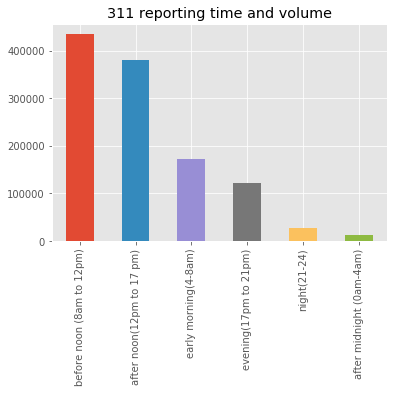

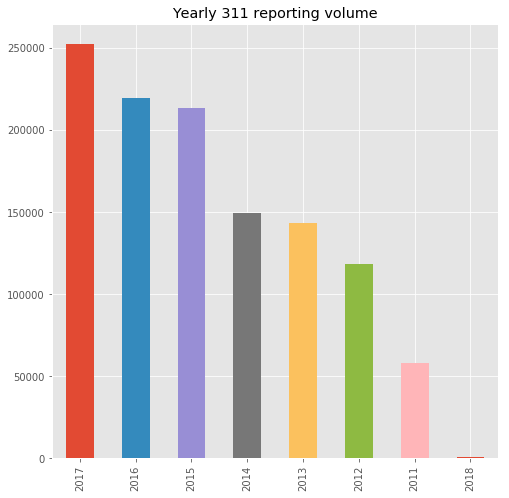

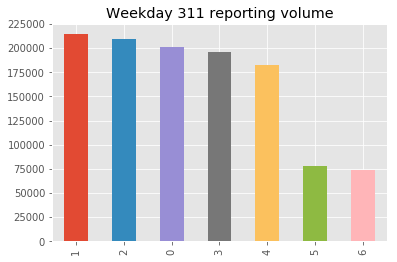

In [138]:
quanbu202['hour'].value_counts().plot(kind='bar', title='311 reporting time and volume')
plt.show()
quanbu202['year'].value_counts().plot(kind='bar', title='Annually 311 reporting volume', figsize=(8,8))
plt.show()
quanbu202['weekday'].value_counts().plot(kind='bar', title='Weekday 311 reporting volume')
plt.show()


#### 3.3 longitudinal analysis

It seems that there are some patterns appeared every year: request go down after Sep. decreasing until Dec and then go up from Jan to Mar. 

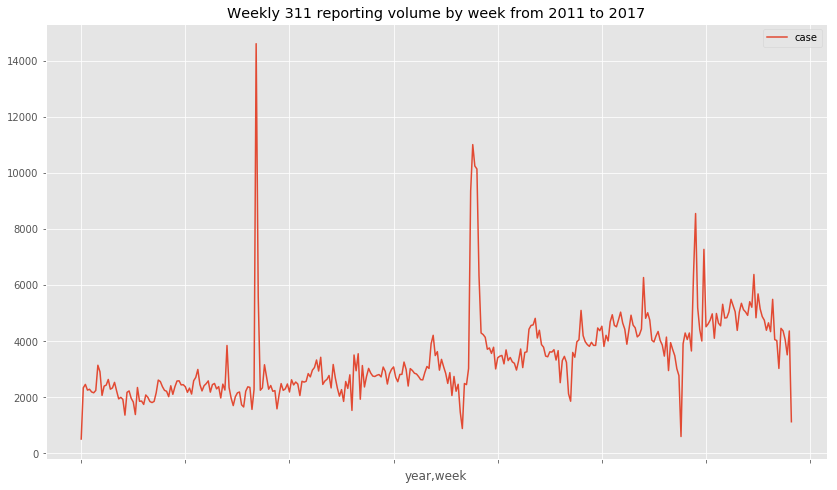

In [26]:
week=quanbu202.pivot_table(index=['year','week'],
                                  values='case',                                
                                  aggfunc='count')
week=week.reset_index()
week.plot(x=['year','week'], kind='line',title='Weekly 311 reporting volume by week from 2011 to 2017',figsize=(14,8))
plt.show()

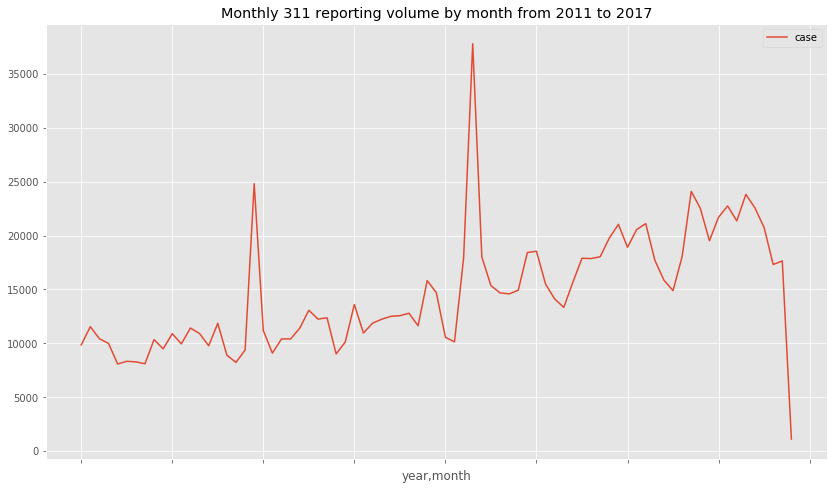

In [27]:
Month= quanbu202.pivot_table(index=['year','month'],
                                  values='case',                                
                                  aggfunc='count')
Month.plot(kind='line', title='Monthly 311 reporting volume by month from 2011 to 2017', figsize=(14,8))
plt.show()

### 4. Analysis based on calling subject, reason and types.  

#### 4.1  SUBJECT of 311 request

Public work department handled most 311 cases every year and the request volumn generally goes up every year.

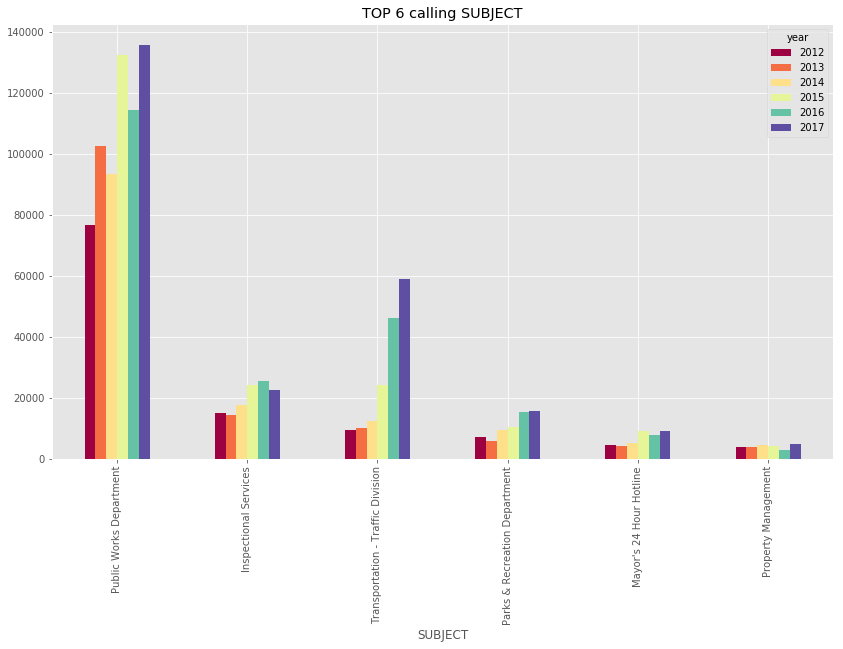

In [41]:
## 311 calling subject graph results 
sub_year = quanbu202.pivot_table(index=['year'],
                                  values='case',
                                  columns='SUBJECT',
                                  aggfunc='count')
sub_year2 = quanbu202.pivot_table(columns=['year'],
                                  values='case',
                                  index='SUBJECT',
                                  aggfunc='count')
sub_year2=sub_year2.sort_values(by=2013,ascending=False)
sub_year2.iloc[0:6,1:7].plot(kind='bar', title='TOP 6 calling SUBJECT',use_index=True,colormap='Spectral',figsize=(14,8))
plt.show()

#### 4.2  REASON of 311 request
Top seven reasons of 311 request from 2011 to 2017 

In [42]:
sub_reason_year = quanbu202.pivot_table(index=['year'],
                                  values='case',
                                  columns=['SUBJECT','REASON'],
                                  aggfunc='count')
sub_reason_year2 = quanbu202.pivot_table(index=['SUBJECT','REASON'],
                                  values='case',
                                  columns=['year'],
                                  aggfunc='count')
sub_reason_total=sub_reason_year2.sum(axis=1)
sub_reason_total=sub_reason_total.sort_values(ascending=False)
sub_reason_total.index[4]

('Public Works Department', 'Street Lights')

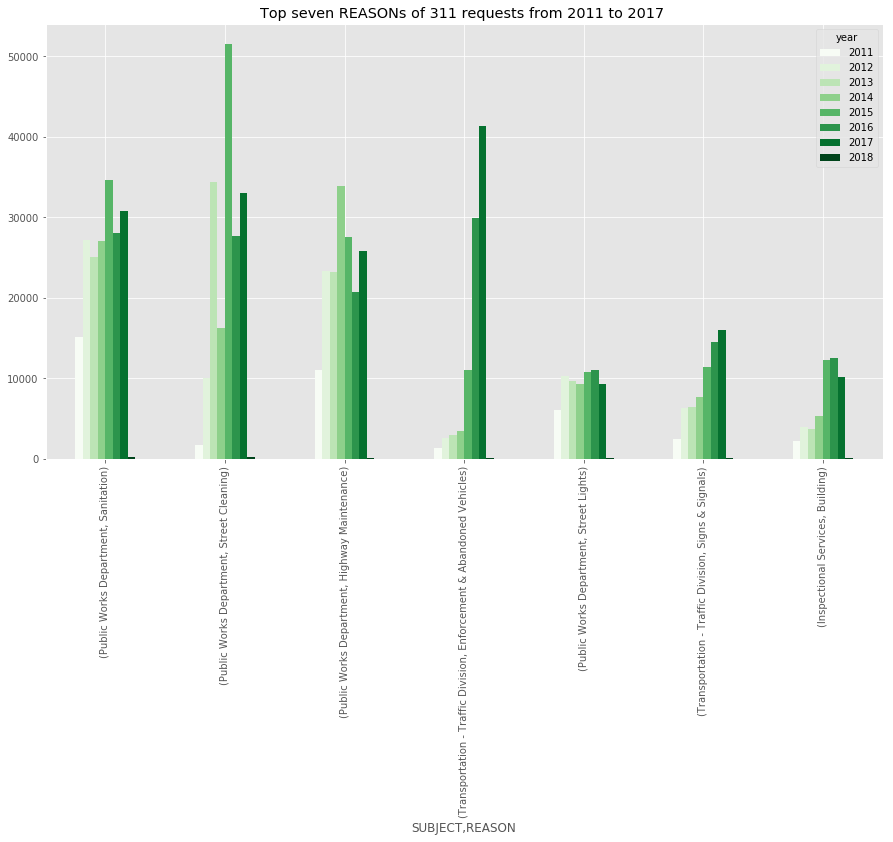

In [45]:
sub_reason_year2.loc[sub_reason_total.index[0:7]].plot(kind='bar', colormap='Greens', use_index=True,figsize=(15,8),
                                                       title='Top seven REASONs of 311 requests from 2011 to 2017 ')
plt.show()

#### 4.3  TYPE of 311 request
Top ten types of 311 request from 2011 to 2017 
The snow plow requests reached significant level in the year of 2015, but remained low in other years.
bulk item pickup was most popular reason of why people calling 311, calling types randed number 1,2 and 4 are all about item pick-up and cleaning.
Parking enforcement growth significantly in 2016 and 2017.
Some types are regularly request by citizens cross years, for example street lights.

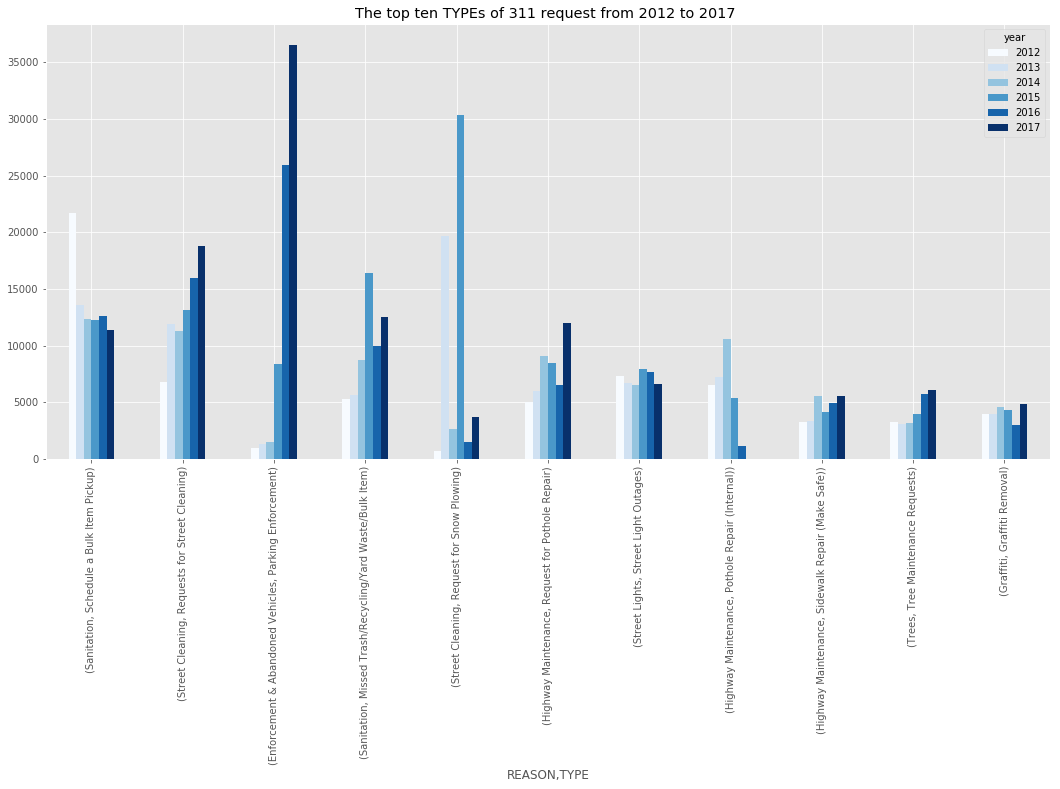

In [59]:
reason_type_year = quanbu202.pivot_table(columns=['year'],
                                  values='case',
                                  index=['REASON','TYPE'],
                                  aggfunc='count')
reason_type_year_total=reason_type_year.sum(axis=1)
reason_type_year_total=reason_type_year_total.sort_values(ascending=False)
reason_type_year.loc[reason_type_year_total.index[0:11],2012:2017].plot(kind='bar', colormap='Blues', 
                                                                        use_index=True,figsize=(18,8), rot=90,
                                                                        title='The top ten TYPEs of 311 request from 2012 to 2017 ')
plt.show()

### 5. Neighborhood analysis
#### 5.1 Neighborhood and calling reason



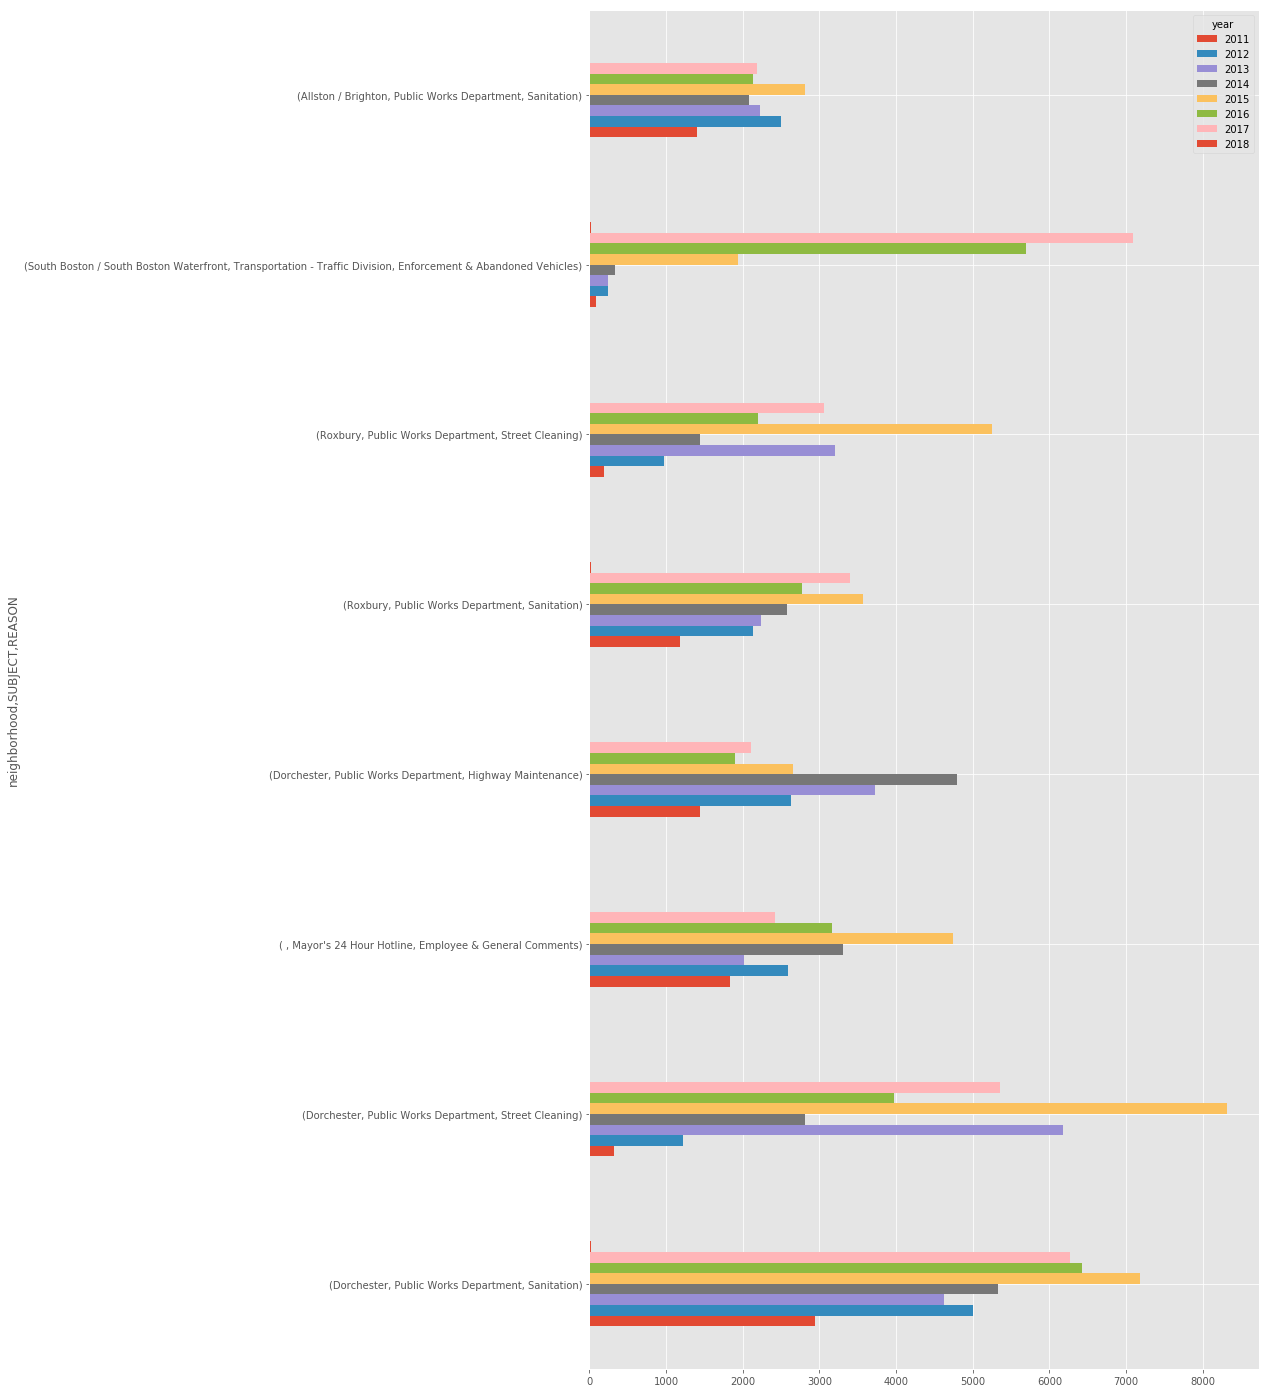

In [30]:
## 311 calling reason+type graph ## 185 types in total ##
neighbor_year = quanbu202.pivot_table(index=['neighborhood','SUBJECT','REASON'],
                                  values='case',
                                  columns=['year'],
                                  aggfunc='count')
neighbor_year['total']=neighbor_year.sum(axis=1)
neighbor_year=neighbor_year.sort_values(by='total', ascending=False)

neighbor_year.iloc[:8,:-1].plot(kind='barh',use_index=True, figsize=(12, 25),title='')
plt.show()


The Missed Trash/Recycling/Yardd waste type in Sanitation directly refers to the sanitation truck pick up service. 
This figure demonstrate a significant winter growth of such services as similar to street cleaning cases. 

#### 5.2 Neighborhood and longitudinal analysis

#### 5.3 Neighborhood and calling source

In [ ]:
The parking enforcement is especially high after the 32 weeks of a year. 

### 6 Calling Sources Analysis
#### 6.1 Data preparation

The Citizen connect app is more popular than traditional phone call in 2017.

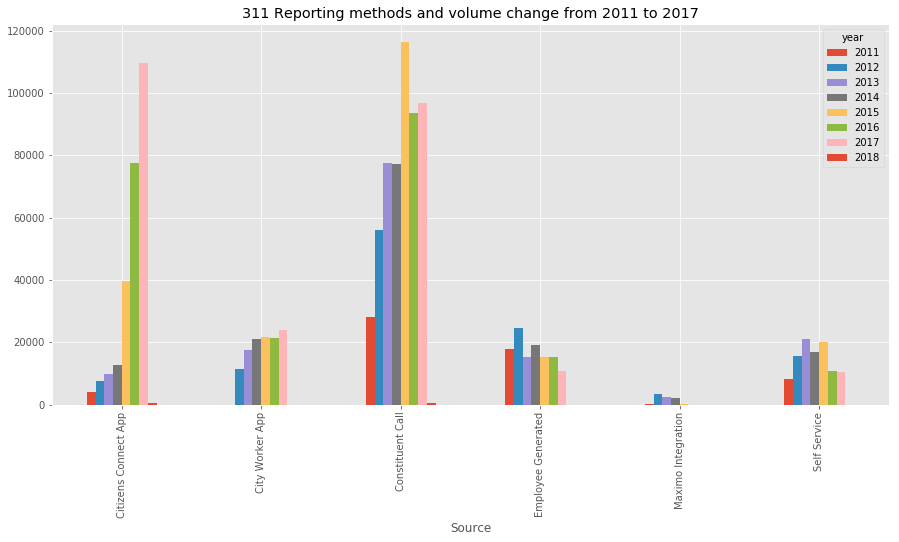

In [77]:
## 311 calling source graph results 
quanbu_source = quanbu202.pivot_table(index=['Source'],
                                  values='case',
                                  columns=['year'],
                                  aggfunc='count')
quanbu_source[:-1].plot(kind='bar',figsize=(15, 7),title='311 Reporting methods and volume change from 2011 to 2017')

plt.show()

#### 6.2 

#### 6.3 

### 7. Government response analysis: Solving duration, ontime and overdue
#### 7.1 calculate 311 case solving duratrions---how long it takes to resolve a 311 case?

In [79]:
quanbu3=quanbu.drop(['CASE_ENQUIRY_ID', 'CASE_TITLE', 'QUEUE', 'SubmittedPhoto', 'ClosedPhoto',
       'Location', 'Fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood_services_district',
       'ward', 'precinct', 'LOCATION_STREET_NAME', 'LOCATION_ZIPCODE'],axis=1)
quanbu3=quanbu3.reset_index()
quanbu3['open_dt']=pd.to_datetime(quanbu3['open_dt'])
quanbu3['closed_dt']=pd.to_datetime(quanbu3['closed_dt'])
quanbu3['Duration']=quanbu3['closed_dt']-quanbu3['open_dt']
quanbu3['SOLVE_DAY']=quanbu3['Duration'].dt.days

In [80]:
quanbu_test=quanbu3.sort_values(by='SOLVE_DAY',ascending=False)
quanbu_test.head()

,open_dt,target_dt,closed_dt,OnTime_Status,CASE_STATUS,CLOSURE_REASON,SUBJECT,REASON,TYPE,Department,neighborhood,Latitude,Longitude,Source,Duration,SOLVE_DAY
1152700,2011-07-08 08:54:45,NaN,2017-11-27 14:09:40,ONTIME,Closed,Case Closed. Closed date : 2017-11-27 14:09:40...,Public Works Department,Highway Maintenance,Roadway Repair,PWDx,Hyde Park,42.2559,-71.1213,Constituent Call,2334 days 05:14:55,2334.0
1149779,2011-07-17 12:40:32,NaN,2017-11-27 14:22:39,ONTIME,Closed,Case Closed. Closed date : 2017-11-27 14:22:39...,Public Works Department,Highway Maintenance,Roadway Repair,PWDx,Hyde Park,42.2549,-71.1243,Constituent Call,2325 days 01:42:07,2325.0
1127216,2011-09-20 19:37:55,2011-09-23 08:30:00,2017-12-19 09:41:22,OVERDUE,Closed,Case Closed. Closed date : 2017-12-19 09:41:22...,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx,Roxbury,42.3220,-71.0953,Citizens Connect App,2281 days 14:03:27,2281.0
1136589,2011-08-26 15:02:42,2011-11-10 08:58:00,2017-11-14 08:35:21,OVERDUE,Closed,Case Closed. Closed date : 2017-11-14 08:35:21...,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx,Roxbury,42.3349,-71.0752,Constituent Call,2271 days 17:32:39,2271.0
1132694,2011-09-03 12:21:11,2011-09-07 12:21:11,2017-11-22 08:18:26,OVERDUE,Closed,Case Closed. Closed date : 2017-11-22 08:18:26...,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx,Dorchester,42.2861,-71.0571,Constituent Call,2271 days 19:57:15,2271.0


In [81]:
quanbu3.shape
solve_table=quanbu3.SOLVE_DAY.value_counts()
solve_table=solve_table/1155047
solve_table=pd.DataFrame(solve_table)
solve_table.head(10) # solve_table[0:99].sum()-1

,SOLVE_DAY
0.0,0.456694
1.0,0.068159
2.0,0.048944
3.0,0.036554
4.0,0.028473
7.0,0.025200
6.0,0.022680
5.0,0.022543
8.0,0.019387
9.0,0.011535


### Interesting     
    From 2011 to 2017, 
     45 percent cases are solved within 24 hours. 
     68.7 percent cases are solved within seven days. 
     82.2 percent cases are solved within a month. 
     However 12.7 percent cases are remain unsolved for more than 100 days.

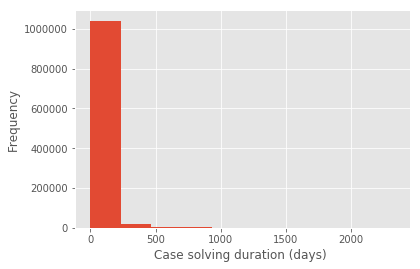

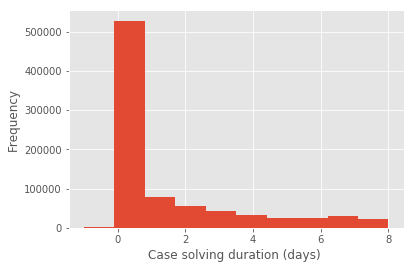

In [82]:
# plot histogram of case solve duration
quanbu3['SOLVE_DAY'].plot.hist()
plt.xlabel('Case solving duration (days) ')
plt.show()
quanbu3[quanbu3['SOLVE_DAY']<=8]['SOLVE_DAY'].plot.hist()
plt.xlabel('Case solving duration (days) ')
plt.show()

#### 7.2  Ontime and overdue analysis.

In [88]:
over_on_time = quanbu3.pivot_table(index=['SUBJECT','REASON','TYPE'],
                                  values='open_dt',
                                  columns=['OnTime_Status'],
                                  aggfunc='count')

In [89]:
over_on_time['OVERDUE']=over_on_time['OVERDUE'].fillna(0)
over_on_time['ONTIME']=over_on_time['ONTIME'].fillna(0)
over_on_time['ontime_ratio']=over_on_time['ONTIME']/(over_on_time['ONTIME']+over_on_time['OVERDUE'])
over_on_time['total']=(over_on_time['ONTIME']+over_on_time['OVERDUE'])
over_on_time=over_on_time.sort_values(by='ontime_ratio',ascending=False).sort_values(by=['total'],ascending=False)

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


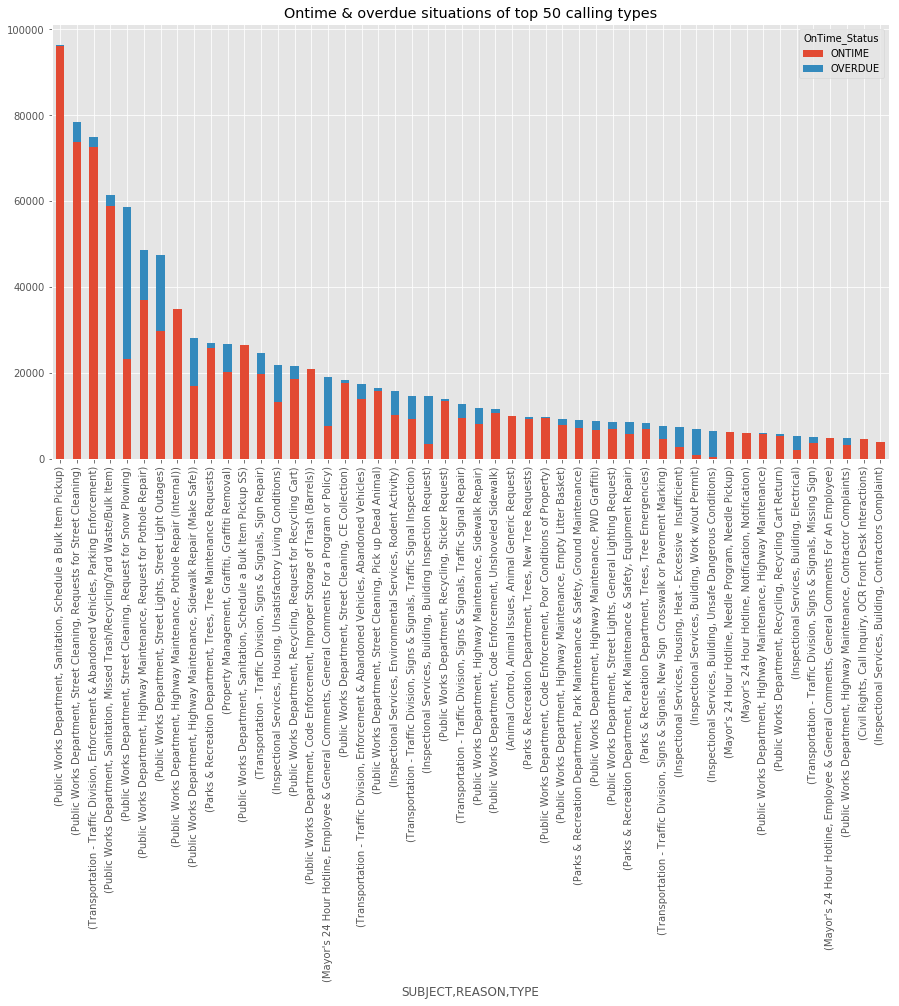

In [92]:
over_on_time[0:50].plot(y=['ONTIME','OVERDUE'],
              kind='bar',stacked=True,figsize=(15, 8),title='Ontime & overdue situations of top 50 calling types')
plt.show()

In [95]:

#over_on_time2=over_on_time.sort_values(by=['ontime_ratio'],ascending=True)
#over_on_time3=over_on_time2.loc[:100].sort_values(by='OVERDUE',ascending=False)
#over_on_time4=over_on_time3.loc[:50].sort_values(by=['ontime_ratio'],ascending=False)
#over_on_time4
over_on_time2=over_on_time[over_on_time['ontime_ratio']<0.5][over_on_time['total']>2000]
over_on_time3=over_on_time2.sort_values(by=['total'],ascending=False)

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


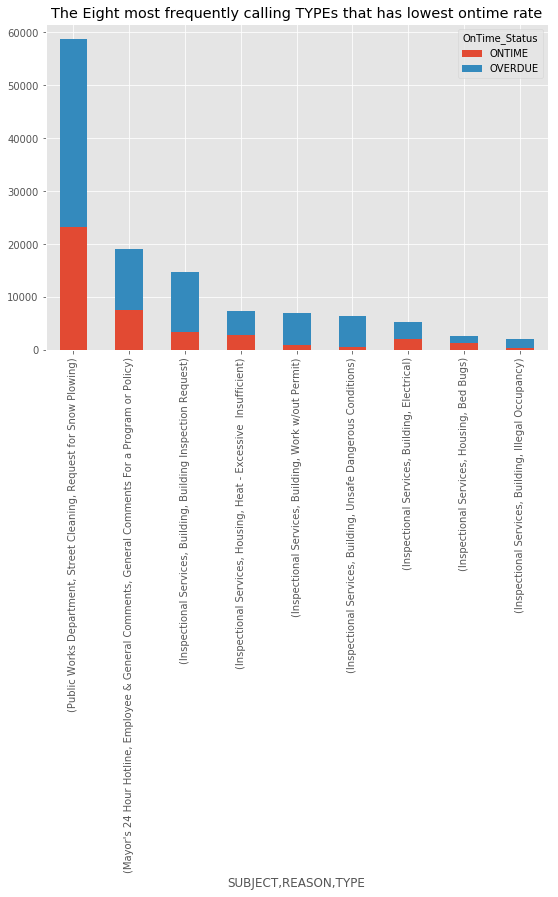

In [98]:
over_on_time3.iloc[:].plot(y=['ONTIME','OVERDUE'],
              kind='bar',stacked=True,figsize=(9, 6),
                           title='The Eight most frequently calling TYPEs that has lowest ontime rate')
plt.show()

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


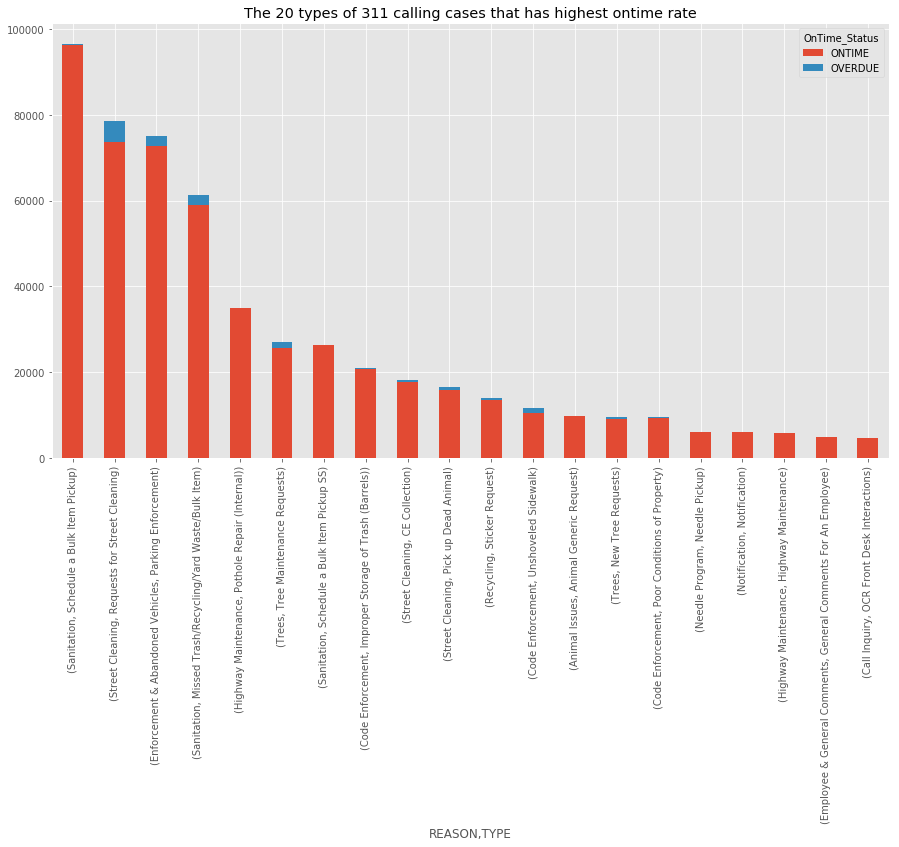

In [353]:
on_time2=over_on_time[over_on_time['ontime_ratio']>0.9][over_on_time['total']>2000]
on_time3=on_time2.sort_values(by=['total'],ascending=False)
on_time3.iloc[:20].plot(x=['REASON','TYPE'],y=['ONTIME','OVERDUE'],
              kind='bar',stacked=True,figsize=(15, 8),title='The 20 types of 311 calling cases that has highest ontime rate')
plt.show()

## Appendix

### The calling SUBJECT, REASON and TYPE breakdown

In [34]:
data_structure = quanbu202.pivot_table(index=['SUBJECT','REASON','TYPE'],
                                  values='case',aggfunc='count') 
data_structure[0:100]

case
SUBJECT                         REASON                            TYPE                                                  
Animal Control                  Animal Issues                     Animal Found                                      1092
                                                                  Animal Generic Request                            9866
                                                                  Animal Lost                                        902
                                                                  Animal Noise Disturbances                          492
Boston Police Department        Noise Disturbance                 Automotive Noise Disturbance                        90
                                                                  Loud Parties/Music/People                          468
Boston Water & Sewer Commission Administrative & General Requests BWSC General Request                              1357
                                Billing                           Billing Complaint                                   64
                                Catchbasin                        Catchbasin                                        2425
                                                                  Roadway Flooding                                    65
                                Fire Hydrant                      Fire Hydrant                                      1150
                                Pothole                           BWSC Pothole                                       163
                                Sidewalk Cover / Manhole          Sidewalk Cover / Manhole                          1653
                                Water Issues                      Watermain Break                                    292
CRM Application                 Test Cases                        Test Case A                                          1
City Hall Truck                 Administration                    Checkin                                             37
Civil Rights                    Call Inquiry                      OCR Front Desk Interactions                       4593
                                Investigations and Enforcement    Housing Discrimination Intake Form                 409
                                Metrolist                         OCR Metrolist                                       55
                                Survey                            Metrolist Survey                                  1917
Consumer Affairs & Licensing    Consumer Affairs Issues           Public Events Noise Disturbances                    44
Disability Department           Disability                        Call Log                                          2105
                                                                  HP Sign Application New                              6
                                                                  HP Sign Application Renewal                          1
Inspectional Services           Administrative                    Follow-Up                                            8
                                Building                          ADA                                                 36
                                                                  Building Inspection Request                      14624
                                                                  Contractors Complaint                             4013
                                                                  Egress                                             540
                                                                  Electrical                                        5281
...                                                                                                                  ...
                                Health                            Unsanitary Conditions - Food                      1557
  

In [35]:
data_structure[100:200]

case
SUBJECT                           REASON                            TYPE                                                  
Inspectional Services             Weights and Measures              Unit Pricing Wrong/Missing                          38
                                                                    Water in Gas - High Priority                        17
Mayor's 24 Hour Hotline           Abandoned Bicycle                 Abandoned Bicycle                                 2993
                                  Air Pollution Control             Rooftop & Mechanical Disturbances                   80
                                  Alert Boston                      Alert Boston                                       301
                                  Current Events                    Miscellaneous Event                                  2
                                                                    Snow Emergency                                       3
                                  Employee & General Comments       General Comments For An Employee                  4874
                                                                    General Comments For a Program or Policy         19123
                                  Fire Department                   Fire Department Request                            602
                                  General Request                   One Boston Day                                      15
                                                                    Student Move-in Issues                             664
                                  Generic Noise Disturbance         Undefined Noise Disturbance                        196
                                  MBTA                              MBTA Request                                       420
                                  Massport                          Aircraft Noise Disturbance                         102
                                  Needle Program                    Needle Pickup                                     6172
                                  Notification                      Notification                                      6012
                                  Programs                          City/State Snow Issues                             787
                                                                    Downed Wire                                        386
                                                                    Flooding Residential/Commercial                      5
                                                                    Heat/Fuel Assistance                                86
                                                                    Senior Shoveling                                     2
Neighborhood Services             Neighborhood Services Issues      Dumpster & Loading Noise Disturbances               93
Parks & Recreation Department     Administrative & General Requests Parks General Request                             1276
                                  Cemetery                          Cemetery Maintenance Request                       130
                                  Park Maintenance & Safety         Capital Improvement Long Term                      161
                                                                    Equipment Repair                                  8461
                                                                    Ground Maintenance                                8966
                                                                    Park Improvement Requests                         1009
                                                                    Park Maintenance Requests                          692
...                                                                                                                    ...
Public Works Department           Recycling                

In [36]:
data_structure[200:]

case
SUBJECT                           REASON                                  TYPE                                                 
Transportation - Traffic Division Enforcement & Abandoned Vehicles        Abandoned Vehicles                              17507
                                                                          Parking Enforcement                             74950
                                  Office of The Parking Clerk             Phone Bank Service Inquiry                         81
                                                                          Walk-In Service Inquiry                            23
                                  Operations                              Parking Meter Repairs                             672
                                                                          Pavement Marking Inspection                       412
                                                                          Pavement Marking Maintenance                     1896
                                                                          Sign Shop WO                                       94
                                  Parking Complaints                      Municipal Parking Lot Complaints                   59
                                                                          Private Parking Lot Complaints                     50
                                  Signs & Signals                         Missing Sign                                     5043
                                                                          New Sign  Crosswalk or Pavement Marking          7565
                                                                          Sign Repair                                     24673
                                                                          Traffic Signal Inspection                       14652
                                                                          Traffic Signal Repair                           12704
                                  Traffic Management & Engineering        General Traffic Engineering Request               432
                                                                          Requests for Directional or Roadway Changes        49
                                                                          Requests for Traffic Signal Studies or Reviews   3035
                                  Valet                                   Valet Parking Problems                             56
Veterans                          Check Investigation                     Check Investigation                                 1
                                  General Request                         Call Log                                           93
                                  Hero Square Sign                        Hero Square Sign Request                            1
Women's Commission                Call Inquiry                            WC Call Log                                        11
Youthline                         Participatory Budgeting Idea Collection Idea Collection                                    72